In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
co2 = pd.read_csv('../data/cleaned/co2_emissions_kt_by_country_clean.csv')
gdp = pd.read_csv('../data/cleaned/gdp_clean.csv')
temp_g = pd.read_csv('../data/cleaned/global_temperatures_cleaned.csv')

In [19]:
co2 = co2[(co2['year']>='2000-01-01') & (co2['year']<='2009-01-01')]
co2.head()

,country_code,country_name,year,co2_in_kt
40,ABW,Aruba,2000-01-01,2379.883
41,ABW,Aruba,2001-01-01,2409.219
42,ABW,Aruba,2002-01-01,2438.555
43,ABW,Aruba,2003-01-01,2563.233
44,ABW,Aruba,2004-01-01,2618.238


In [20]:
# find out the top 10 countries with the highest co2 emission in the years 2000-2010
co2rank = pd.pivot_table(co2, index='country_name', values='co2_in_kt', aggfunc=sum).sort_values('co2_in_kt', ascending=False, ignore_index=False
)
co2rank.head(50)

C:\Users\schue\AppData\Local\Temp\ipykernel_28360\1167040698.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  co2high = pd.pivot_table(co2, index='country_name', values='co2_in_kt', aggfunc=sum).sort_values('co2_in_kt', ascending=False, ignore_index=False


,co2_in_kt
country_name,
World,2.981688e+08
IDA & IBRD total,1.556152e+08
Low & middle income,1.496363e+08
IBRD only,1.489737e+08
Middle income,1.475843e+08
High income,1.460320e+08
OECD members,1.421625e+08
Post-demographic dividend,1.347852e+08
Upper middle income,1.106756e+08


In [21]:
country_top10 = ['China','United States','Russian Federation','India','Japan','Germany','Canada','United Kingdom','Korea, Rep.','Iran, Islamic Rep.']

In [32]:
co2_top10 = co2[co2['country_name'].isin(country_top10)]
co2_top10

,country_code,country_name,year,co2_in_kt
1900,CAN,Canada,2000-01-01,5.142200e+05
1901,CAN,Canada,2001-01-01,5.066200e+05
1902,CAN,Canada,2002-01-01,5.243500e+05
1903,CAN,Canada,2003-01-01,5.445400e+05
1904,CAN,Canada,2004-01-01,5.364200e+05
...,...,...,...,...
13255,USA,United States,2006-01-01,5.653080e+06
13256,USA,United States,2007-01-01,5.736320e+06
13257,USA,United States,2008-01-01,5.558380e+06
13258,USA,United States,2009-01-01,5.156430e+06


In [39]:
co2_top10_pivot = co2_top10.pivot_table(index='country_name', values='co2_in_kt', aggfunc=sum)
co2_top10_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_28360\825749805.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  co2_top10_pivot = co2_top10.pivot_table(index='country_name', values='co2_in_kt', aggfunc=sum)


,co2_in_kt
country_name,
Canada,5.896140e+06
China,6.287527e+07
Germany,8.867360e+06
India,1.331195e+07
"Iran, Islamic Rep.",4.927440e+06
Japan,1.302748e+07
"Korea, Rep.",5.432120e+06
Russian Federation,1.765201e+07
United Kingdom,5.770810e+06


<Axes: xlabel='co2_in_kt', ylabel='country_name'>

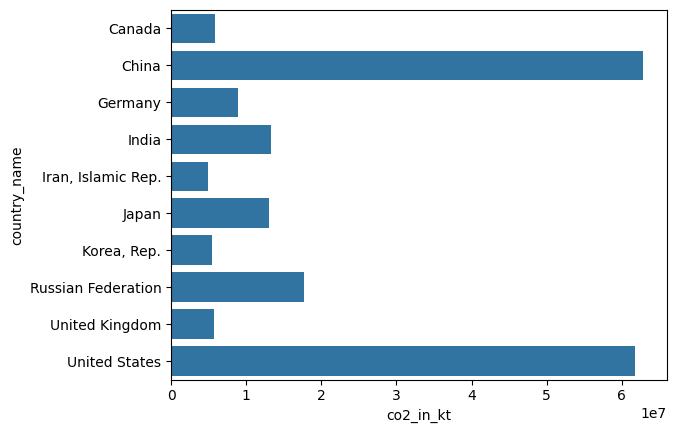

In [36]:
sns.barplot(data=co2_top10_pivot, y='country_name', x='co2_in_kt')

<Axes: xlabel='co2_in_kt', ylabel='country_name'>

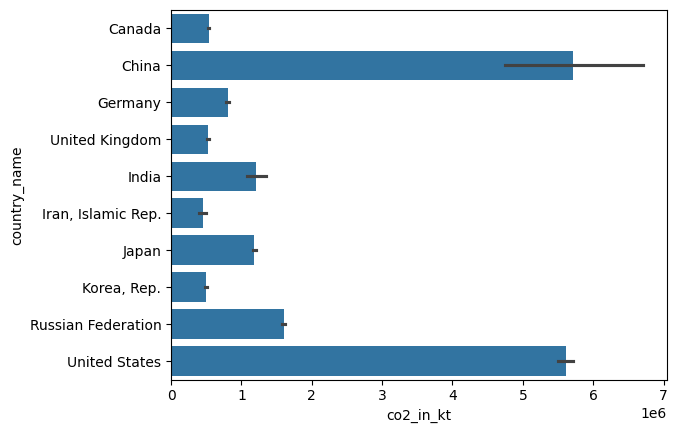

In [38]:
sns.barplot(data=co2_top10, y='country_name', x='co2_in_kt')

In [ ]:
gdp = gdp[(gdp['year']>='2000-01-01') & (gdp['year']<='2010-01-01')].sort_values(by='total_gdp_per_year',ascending = False)
gdp

In [22]:
gdprank = pd.pivot_table(gdp, index='country_name', values='total_gdp_per_year', aggfunc=sum).sort_values('total_gdp_per_year', ascending=False)
gdprank.head(50)

C:\Users\schue\AppData\Local\Temp\ipykernel_28360\2838698802.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  gdprank = pd.pivot_table(gdp, index='country_name', values='total_gdp_per_year', aggfunc=sum).sort_values('total_gdp_per_year', ascending=False)


,total_gdp_per_year
country_name,
World,1.487469e+15
High income,1.111902e+15
OECD members,1.098365e+15
Post-demographic dividend,1.055892e+15
Europe & Central Asia,4.919943e+14
North America,4.213468e+14
European Union,4.133394e+14
IDA & IBRD total,3.885541e+14
United States,3.860829e+14


In [ ]:
#co2['country_name'].value_counts()
#co2['country_name'].unique()

In [ ]:
#gdp['country_name'].unique()

In [ ]:
#data_merge = temp_g.merge(df_right, how='left', on='common_column', left_on=left_common_column, right_on=right_common_column)